### Практикум № 1

#### Gibbs sampling

In this lab work you should solve Gibbs sampler for bivariate normal distribution

#### 1. Posterior distrinution

$$ f(x,y) = \frac{1}{\sqrt{2\pi det|\Sigma|}}  exp(-\frac{1}{2}((\overrightarrow{x} - m)^{T}\Sigma^{-1}(\overrightarrow{x} - m)^{T}))$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

In [4]:
f = lambda x,m,sigma : np.exp(-1/2*( (x - m).T*np.linalg.inv(sigma)*(x - m)))/ np.sqrt(2*np.pi*np.linalg.det(sigma)) 

In [89]:
np.float(f(np.matrix([[0],[0]]),np.matrix([[2],[7]]),np.matrix([[3,2],[2,8]])))

0.004120401495594495

In [84]:
def plot_function_and_contourplot(m,sigma):
    
    x_mesh,y_mesh = np.meshgrid(np.linspace(-10,10,100),np.linspace(-10,10,100))
    z = np.array([ [np.float(f(np.matrix([[xps[i]],[yps[0]]]),m,sigma)) for i in range(len(xps))]  for xps,yps in zip(x_mesh,y_mesh)])
    
    fig,ax = plt.subplots(figsize=(8,4))
    CS =ax.contour(x_mesh,y_mesh,z,cmap='rainbow')
    ax.clabel(CS,fontsize=10)
    plt.xlim([-3,4])
    plt.ylim([-4,4])
    
    fig,ax = plt.subplots(figsize=(8,4))
    ax_2 = fig.gca(projection='3d')
    ax_2.plot_surface(x_mesh,y_mesh,z,cmap='viridis')

    plt.show();

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  del sys.path[0]


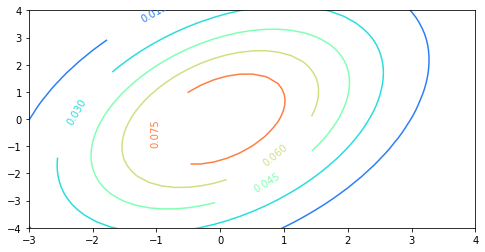

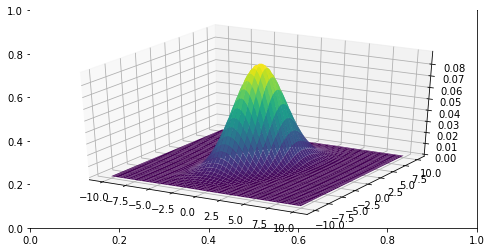

In [90]:
plot_function_and_contourplot(np.matrix([[0],[0]]),np.matrix([[3,2],[2,8]]));

#### 2. Conditional distribution

Let's imagine we can't sample directly from this distribution so it isn't known up to constant. That's why, we should apply Gibbs sampling over all conditional distributions

$$ \hat{x} = p(x|y)$$
$$ \hat{y} = p(y|x=\hat{x})$$

http://www.ccs.neu.edu/home/vip/teach/MLcourse/3_generative_models/lecture_notes/Marginal%20and%20conditional%20distributions%20of%20multivariate%20normal%20distribution.pdf

Let's to give Gibbs sampling function 2 conditional distributions

$$ f_{x|y} = \mathcal{N} (\mu_{x} + \Sigma_{xy}\Sigma^{-1}_{yy}(y - \mu_{y}) |  \Sigma_{yy} - \Sigma^{T}_{xy}\Sigma^{-1}_{yy}\Sigma_{xy})$$

$$x|y = \mathcal{N}(\frac{3y}{8},\frac{20}{3})$$ 

$$y|x = \mathcal{N}(\frac{2x}{3},\frac{5}{2})$$ 

#### 3. Gibbs sampler

In [166]:
def gibbs_sampler(max_iter):
    X,Y = [],[]
    x_min = -1
    x_max = 6
    y_min = -1
    y_max = 6
    
    x = np.random.uniform(x_min,x_max)
    y = np.random.uniform(y_min,y_max)
    
    for i  in range(max_iter):
        x = np.random.normal(loc = 3*y/8 , scale = np.sqrt(20/3)) # scale is standart deviation
        y = np.random.normal(loc = 2*x/3 , scale = np.sqrt(5/2)) # scale is standart deviaton
    
        X.append(x)
        Y.append(y)

    return X,Y

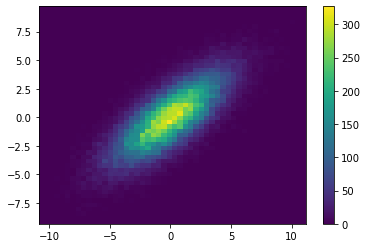

In [162]:
### 2D histogramm
result = gibbs_sampler(50000)
X = result[0][1000:-1] # burnin
Y = result[1][1000:-1] # burnin
plt.hist2d(result[0],result[1],bins = 50);
plt.colorbar()

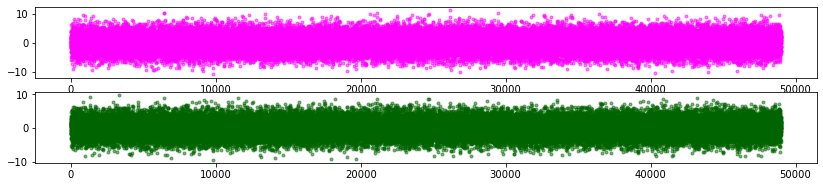

In [163]:
### plot traceplots
fig = plt.figure(figsize=(14,6))
ax_1 = fig.add_subplot(4,1,1)
ax_2 = fig.add_subplot(4,1,2)

ax_1.plot(X,".",color='magenta',alpha=0.5)
ax_2.plot(Y,".",color='darkgreen',alpha=0.5)
plt.show();

In [164]:
def contour_plot_and_scatter(m,sigma,X,Y):
    
    x_mesh,y_mesh = np.meshgrid(np.linspace(-10,10,100),np.linspace(-10,10,100))
    z = np.array([ [np.float(f(np.matrix([[xps[i]],[yps[0]]]),m,sigma)) for i in range(len(xps))]  for xps,yps in zip(x_mesh,y_mesh)])
    fig,ax = plt.subplots(figsize=(10,6))
    CS = ax.contour(x_mesh,y_mesh,z,labels= [1,2,3,4,5,6],cmap='rainbow')
    ax.clabel(CS,fontsize=10)
    
    ax.scatter(X,Y,color='pink',alpha=0.2)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'labels'
  


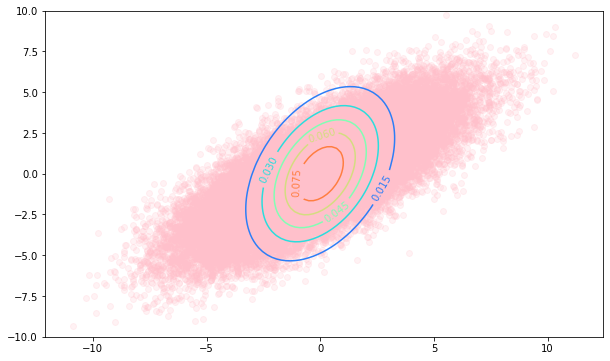

In [165]:
contour_plot_and_scatter(np.matrix([[0],[0]]),np.matrix([[3,2],[2,8]]),X,Y)